Plot the locations of the profiles for the different regions. 

In [1]:
import os
import glob
import netCDF4
import logging
import numpy as np
import emodnetchemistry
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [2]:
logger = logging.getLogger("EMODnet-Data")
logger.setLevel(logging.DEBUG)
logging.info("Starting")

In [3]:
datadir = "/data/EMODnet/Chemistry/insitu/"
figdir = "../figures/"
datafilelist = sorted(glob.glob(os.path.join(datadir, "*utrophication*.nc")))
nfiles = len(datafilelist)
logger.info("Working on {} files".format(nfiles))

INFO:EMODnet-Data:Working on 6 files


Define the 6 regions

In [32]:
arctic = emodnetchemistry.Region(-44.25, 70.0, 56.5, 83.0, 0.25, 0.125, "Arctic region")
neatlantic = emodnetchemistry.Region(-42.0, -0.1, 24.9, 48.0, 0.1, 0.1, "North-East Atlantic Ocean")
balticsea = emodnetchemistry.Region(9.4, 30.9, 53.0, 65.9, 0.1, 0.1, "Baltic Sea")
blacksea = emodnetchemistry.Region(26.5, 41.95, 40.0, 47.95, 0.05, 0.05, "Black Sea")
mediterranean = emodnetchemistry.Region(-7.0, 36.375, 30.0, 45.875, 0.125, 0.125, "Mediterranean Sea")
northsea = emodnetchemistry.Region(-5.4, 13.0, 47.9, 62.0, 0.1, 0.1, "North Sea")
regionlist = [arctic, blacksea, balticsea, mediterranean, neatlantic, northsea]

## Make plot
Define projection

In [33]:
m = Basemap(projection='ortho',lon_0=5.,lat_0=45,resolution='c')

### Simple dot plot

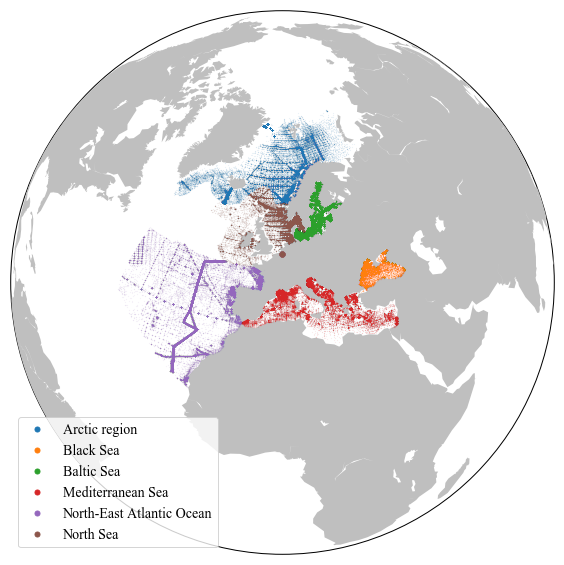

In [38]:
fig = plt.figure(figsize=(10, 10))
for region, datafile in zip(regionlist, datafilelist):
    region.get_data_coords(datafile)
    pp = m.plot(region.londata, region.latdata, "o", ms=.03, latlon=True)
    col = pp[0].get_color()
    m.plot(5., 51., "o", ms=5, color=col, markerfacecolor=col, latlon=True, label=region.name)
m.fillcontinents(color=".75")
plt.legend(fontsize=14)
plt.savefig("../figures/EMODnet_data_domains.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()

### Data location and domains

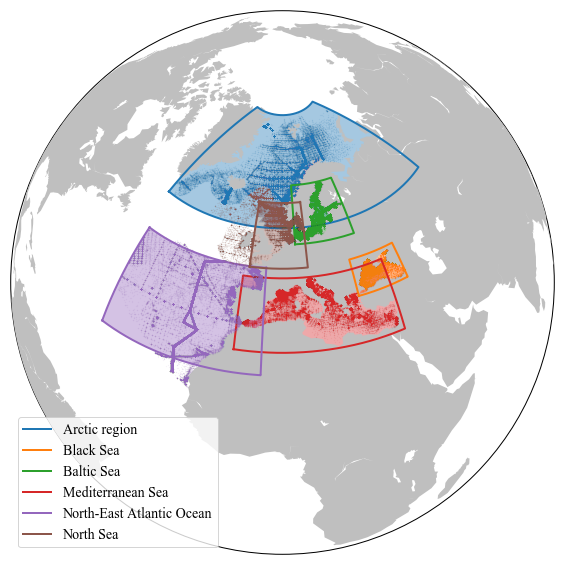

In [39]:
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
for region, datafile in zip(regionlist, datafilelist):
    # Get coordinates of observations
    region.get_data_coords(datafile)
    pp = m.plot(region.londata, region.latdata, "o", ms=.03, latlon=True)
    col = pp[0].get_color()

    # Get rectangle of products
    region.get_rect_coords()
    region.get_rect_patch(m, facecolor=col, alpha=0.4)

    m.plot(region.lonvector, region.latvector, color=col, 
           latlon=True, label=region.name, linewidth=2)
    ax.add_patch(region.rect)
    
m.fillcontinents(color=".75")
plt.legend(fontsize=14)
plt.savefig("../figures/EMODnet_data_domains02.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()

### Hexbin plot

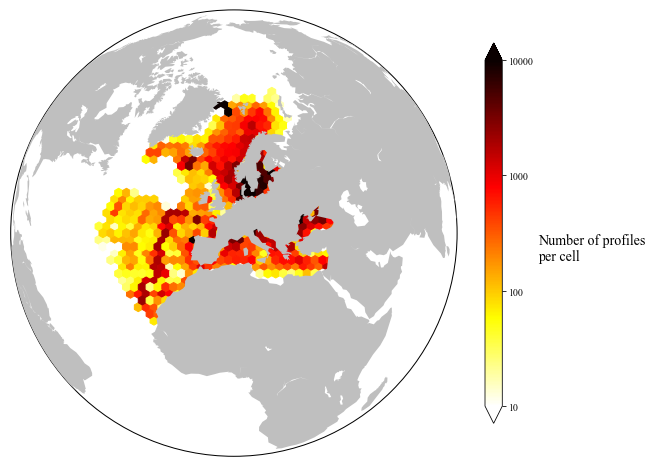

In [40]:
fig = plt.figure(figsize=(10, 10))
lonall = np.array([])
latall = np.array([])
for datafile in datafilelist:
    with netCDF4.Dataset(datafile, "r") as nc:
        lon = nc.get_variables_by_attributes(standard_name="longitude")[0][:]
        lat = nc.get_variables_by_attributes(standard_name="latitude")[0][:]
    # m.plot(lon, lat, "wo", ms=.03, latlon=True, zorder=4)
    llon, llat = m(lon, lat)
    lonall = np.append(lonall, llon)
    latall = np.append(latall, llat)
    
m.hexbin(lonall, latall, bins="log", vmin=1, vmax=4.,
         mincnt=3, gridsize=30, zorder=3, cmap=plt.cm.hot_r)
m.fillcontinents(color=".75", zorder=5)
cb = plt.colorbar(shrink=.7, extend="both")
cb.set_ticks([1., 2., 3., 4.])
cb.set_ticklabels(["10", "100", "1000", "10000"])
cb.set_label("Number of profiles\nper cell", fontsize=14, rotation=0, ha="left")
plt.savefig("../figures/EMODnet_datadensity.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()